In [15]:
# Import all of the requried libraries
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd
# import statistics
from statistics import mode,mean
from scipy import interpolate

# These are all of the libraries that I manually created
import IOfunctions as IO
import GUIfunctions as GUI
import Processfunctions as process

#
# Through Thorlabs
#
# start_index = 32  # Start index 32 is the full spectrum (from 195nm)
# start_index = 774 # starts at 350nm
#
# Through 3D slicer
#
# start_index = 0 # starts at 195nm
start_index = 742 # starts at 350nm


### Data Loading and Formatting 
#### Load in (IO)
* Load in the raw data + baselines and convert it into a useable list of numpy arrays
* Broadband output
* White paper

In [18]:
# Load in the raw data
# This could also probably move to IO

# path = '../BroadbandProject/rawdata/'    
# BeefData = IO.loadDataset(path + 'BeefData/',36)
# B_labels = 0*np.ones(len(BeefData))
# ChickenData = IO.loadDataset(path + 'ChickenData/',36)
# C_labels = 1*np.ones(len(ChickenData))
# PorkData = IO.loadDataset(path + 'PorkData/',36)
# P_labels = 2*np.ones(len(PorkData))
# TurkeyData = IO.loadDataset(path + 'TurkeyData/',36)
# T_labels = 3*np.ones(len(TurkeyData))

# LOAD IN DATA 
num_samples = 90 #### This should not be hardcoded **
path = 'C:/OpticalSpectroscopy_TissueClassification/broadbandTestData/'
data_0 = IO.loadDataset(path + 'desk/desk',num_samples,start_index=start_index,sep=',')
labels_0 = 0*np.ones(len(data_0))
data_1 = IO.loadDataset(path + 'cork/cork',num_samples,start_index=start_index,sep=',')
labels_1 = 1*np.ones(len(data_1))

# LOAD IN BASELINES
path = 'C:/OpticalSpectroscopy_TissueClassification/raw_data/'
file_name = 'white_baseline.csv'
baseline_pap = IO.loadSpectrum(path, file_name, 'Wavelength', start_index=774)

file_name = 'SLS201L_Spectrum_reformatted.csv'
baseline_BrOut_raw = IO.loadSpectrum(path=path, name=file_name,start_index=0, end_index=675, sep=',')
# Interpolate such that the downloaded spectrum has the same values of the data
x = baseline_BrOut_raw[:,0]
y = baseline_BrOut_raw[:,1]
f = interpolate.interp1d(x,y)
xnew = data_0[0,:,0]
ynew = f(xnew)
baseline_BrOut = np.transpose(np.array([xnew,ynew]))

### Display the raw data
* Display a pork and chicken sample
* Display the broadband source output

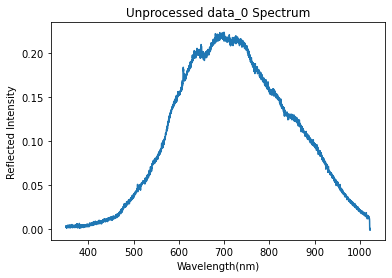

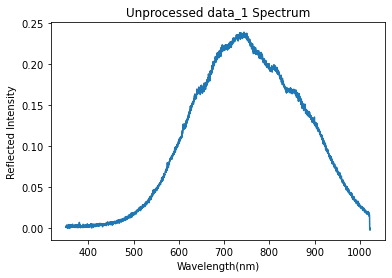

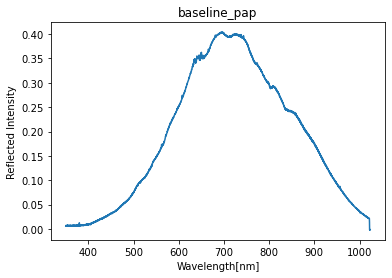

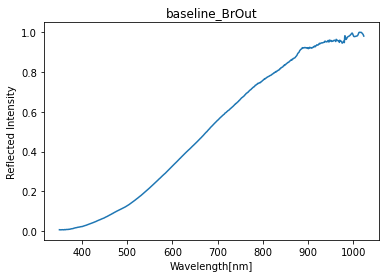

In [19]:
# Displaying all of the spectra to visually inspect results

# GUI.plotall(data_0)
# GUI.plotall(data_1)
# GUI.plotall(data_2)
# GUI.plotall(data_3)

# This should be in GUI with all the inputs as parameters
wavelength_start = data_0[0,0,0] # ** I should get this from the actual spectrum data
wavelength_end = data_0[0,-1,0]

w = np.linspace(wavelength_start,wavelength_end,len(data_0[1]))
# Display an example of data_0
GUI.plotSpectra(xdata=data_0[0,:,0],ydata=data_0[0,:,1],xlab='Wavelength(nm)',ylab='Reflected Intensity',
                title='Unprocessed data_0 Spectrum' )
# Display an example of data_1
GUI.plotSpectra(xdata=data_1[0,:,0], ydata=data_1[0,:,1],xlab='Wavelength(nm)',ylab='Reflected Intensity',
                title='Unprocessed data_1 Spectrum' )
# Display an example of paper
GUI.plotSpectra(xdata=baseline_pap[:,1],ydata=baseline_pap[:,0],xlab="Wavelength[nm]",
            ylab='Reflected Intensity',title='baseline_pap')
# Display an example of broadband output
GUI.plotSpectra(xdata=baseline_BrOut[:,0],ydata=baseline_BrOut[:,1],xlab="Wavelength[nm]",
            ylab='Reflected Intensity',title='baseline_BrOut')

### Preprocessing of the data
* Crop to 350nm to 1024nm
* Normalize (MinMax norm)
* Subtract the normalized broadband output
* Dimensionality reduction
* Max binning?

In [20]:
# Load in the baseline 
baseline = baseline_BrOut # --------------------------------- flag
# baseline = baseline_pap[:,0]
baseline = process.normalize(baseline)

# Normalize all data
data_0_norm = process.normalize(data_0)
# data_0_saved = data_0_norm
# data_0_norm = process.subtractBaseline(data_0_norm,baseline)
# data_0_norm = process.normalize(data_0_norm)

data_1_norm = process.normalize(data_1)
# data_1_saved = data_1_norm
# data_1_norm = process.subtractBaseline(data_1_norm,baseline)
# data_1_norm = process.normalize(data_1_norm)

print('Size of data_0,', data_0_norm.shape)
print('Size of data_1,', data_1_norm.shape)


Size of data_0, (90, 2904, 2)
Size of data_1, (90, 2904, 2)


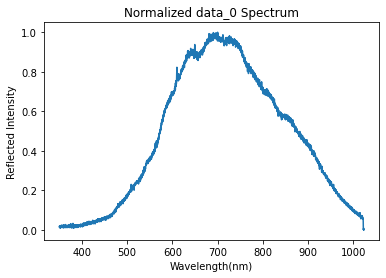

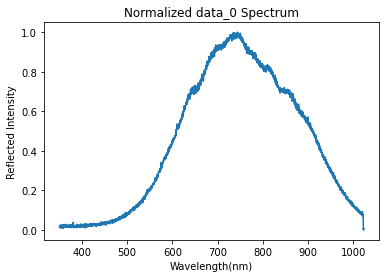

In [21]:
# Plots of the normalized spectra
GUI.plotSpectra(xdata=data_0_norm[0,:,0],ydata=data_0_norm[0,:,1],xlab='Wavelength(nm)',ylab='Reflected Intensity',
                title='Normalized data_0 Spectrum' )
GUI.plotSpectra(xdata=data_1_norm[0,:,0],ydata=data_1_norm[0,:,1],xlab='Wavelength(nm)',ylab='Reflected Intensity',
                title='Normalized data_0 Spectrum' )

In [22]:
# w = np.linspace(350,1024,len(BeefData[1]))
# plt.figure()
# plt.plot(w,B_saved[1])
# plt.plot(w,P_saved[1])
# plt.xlabel('Wavelength(nm)')
# plt.ylabel('Reflected Intensity')
# plt.title('Normalized Spectra')

# plt.legend(['Beef','Pork'])

# plt.figure()
# plt.plot(w,baseline)
# plt.title('Baseline Spectrum')
# plt.ylabel('Reflected Intensity')
# plt.xlabel('Wavelength(nm)')

In [23]:
# idx = 0
# w = np.linspace(350,1024,len(BeefData[1]))
# plt.figure()
# plt.plot(w,B_norm[idx])
# plt.title('Beef normalized')
# plt.figure()
# plt.plot(w,P_norm[idx])
# plt.title('Pork normalized')
# plt.figure()
# plt.plot(w,C_norm[idx])
# plt.title('Chicken normalized')
# plt.figure()
# plt.plot(w,T_norm[idx])
# plt.title('Turkey normalized')

In [24]:
# idx = 0
# plt.figure()
# plt.plot(w,B_norm[idx])
# plt.plot(w,P_norm[idx])
# plt.plot(w,C_norm[idx])
# plt.plot(w,T_norm[idx])
# plt.title('After baseline subtraction')
# plt.legend(['Beef','Pork','Chicken','Turkey'])
# plt.ylabel('Reflected Intensity')
# plt.xlabel('Wavelength(nm)')

# plt.figure()
# plt.plot(np.transpose(B_norm))

# plt.figure()
# plt.plot(np.transpose(P_norm))


In [25]:
# Plotting all of the normalized results after baseline subtraction
# plotall(B_norm)
# plotall(C_norm)
# plotall(P_norm)
# plotall(T_norm)

# Plot the averages of each 
# print(B_norm.shape)

# plt.figure()
# plt.plot(np.mean(B_norm,axis=0))
# plt.plot(np.mean(C_norm,axis=0))
# plt.plot(np.mean(P_norm,axis=0))
# plt.plot(np.mean(T_norm,axis=0))
# plt.legend(['B','C','P','T'])
# xtemp = [[1,1],[2,2],[3,3],[4,4],[5,5]]
# np.mean(B_norm,axis=0)

### The next step is dimensionality reduction
* Use PCA for dimensionality reduction

In [26]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=0.9999, svd_solver='full')
pca = PCA(n_components=35) 
# The proper way to do this is to do pca.fit to the training data. Set the n_components to the minimum of the sets so 35

# X_train, X_val, X_test = stratdata(B_norm,C_norm,P_norm,T_norm,i)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_val = pca.transform(X_val)
# X_test = pca.transform(X_test)

# # This is a poor way to do it
# B_reduced = pca.fit_transform(B_norm)
# C_reduced = pca.fit_transform(C_norm)
# P_reduced = pca.fit_transform(P_norm)
# T_reduced = pca.fit_transform(T_norm)
# print(B_reduced.shape)

# select if I want to use the full or reduced dataset

# B_data   = B_reduced.copy()
# C_data   = C_reduced.copy()
# P_data   = P_reduced.copy()
# T_data   = T_reduced.copy()

# B_data = B_norm.copy()
# C_data = C_norm.copy()
# P_data = P_norm.copy()
# T_data = T_norm.copy()

# B_data.shape

### Stratify data

In [27]:
# This function takes in the beef,chicken,pork, and turkey data
def stratdata(b,c,p,t,case):
    # Break each into 
    b1,b2,b3,b4 = chunkdata(b)
    c1,c2,c3,c4 = chunkdata(c)
    p1,p2,p3,p4 = chunkdata(p)
    t1,t2,t3,t4 = chunkdata(t)
    
    d1 = np.concatenate([b1,c1,p1,t1])
    d2 = np.concatenate([b2,c2,p2,t2])
    d3 = np.concatenate([b3,c3,p3,t3])
    d4 = np.concatenate([b4,c4,p4,t4])
    
    # implement a switch-case
    if case == 1:
        train = np.concatenate([d1,d2])
        val   = d3
        test  = d4
    elif case == 2:
        train = np.concatenate([d1,d3])
        val   = d2
        test  = d4
    elif case == 3:
        train = np.concatenate([d2,d3])
        val   = d1
        test  = d4
    elif case == 4:
        train = np.concatenate([d1,d2])
        val   = d4
        test  = d3
    elif case == 5:
        train = np.concatenate([d1,d4])
        val   = d2
        test  = d3
    elif case == 6:
        train = np.concatenate([d2,d4])
        val   = d1
        test  = d3
    elif case == 7:
        train = np.concatenate([d1,d4])
        val   = d3
        test  = d2
    elif case == 8:
        train = np.concatenate([d1,d3])
        val   = d4
        test  = d2
    elif case == 9:
        train = np.concatenate([d4,d3])
        val   = d1
        test  = d2
    elif case == 10:
        train = np.concatenate([d2,d4])
        val   = d3
        test  = d1
    elif case == 11:
        train = np.concatenate([d3,d4])
        val   = d2
        test  = d1
    elif case == 12:
        train = np.concatenate([d2,d3])
        val   = d4
        test  = d1
    else:
        print("Invalid case selected!")
    
    return train,val,test

# Breaks the data into 4 corner chunks
def chunkdata(data):    
    data = data.copy()
    d1 = data[[0,1,2,6,7,8,12,13,14]]
    d2 = data[[3,4,5,9,10,11,15,16,17]]
    d3 = data[[18,19,20,24,25,26,30,31,32]]
    d4 = data[[21,22,23,27,28,29,33,34,35]]
    return d1,d2,d3,d4

#X_train, X_val, X_test = stratdata(B_data,C_data,P_data,T_data,1)
#y_train, y_val, y_test = stratdata(B_labels,C_labels,P_labels,T_labels,1)

### Train ML models

In [28]:
# This is revamped to just train the classifier and save it
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,roc_auc_score
from random import Random

X_train = np.concatenate([data_0[:,:,1],data_1[:,:,1]])
y_train = np.concatenate([labels_0,labels_1])

# Instantiate the model
modelKNN = KNeighborsClassifier(n_neighbors=3)

# Train the model
modelKNN.fit(X_train,y_train)

# Save the model to file
from joblib import dump, load
dump(modelKNN, 'Models/KNN_TestModel.joblib') 

['Models/KNN_TestModel.joblib']

In [29]:
print(sklearn.__version__)

1.1.1


In [30]:
for i in range(len(data_0[:,0,0])):
    test = data_1[i,:,1]
    test = test.reshape(1, -1)
    predicted = modelKNN.predict(test)
#     print(predicted)
test.shape

data_1[i,:,1].shape

(2904,)

In [15]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,roc_auc_score
# from random import Random

# F1s = []
# Accs = []
# cf_matrix = 0
# # for i in range(1,13):
# for i in range(2):
#     X_train, X_val, X_test = stratdata(B_data,C_data,P_data,T_data,i+1)
#     y_train, y_val, y_test = stratdata(B_labels,C_labels,P_labels,T_labels,i+1)
#     X_train = np.concatenate([X_train,X_val])
#     y_train = np.concatenate([y_train,y_val])
# #     print(X_train.shape)
    
#     # Randomize the training set so it's not so clumped
# #     X_train = np.transpose(X_train)
# #     y_train = np.transpose(y_train)
# # #     Random(i).shuffle(X_train)
# # #     Random(i).shuffle(y_train)
# #     X_train = np.transpose(X_train)
# #     y_train = np.transpose(y_train)
# #     print(X_train.shape)
#     # Instantiate the model
#     modelKNN = KNeighborsClassifier(n_neighbors=3)

#     # Train the model
#     modelKNN.fit(X_train,y_train)
    
#     # Test the model
#     predicted = modelKNN.predict(X_test)       
#     F1s.append(f1_score(y_test,predicted,average='weighted'))
#     Accs.append(accuracy_score(y_test,predicted))
#     cf_matrix += confusion_matrix(y_test, predicted)
    
# print(cf_matrix/sum(cf_matrix))    
# # plt.figure()
# # plt.plot(np.transpose(X_train))
# # print(X_train.shape)
# print('F1s', F1s)
# print('The mean f1 score is: ',np.mean(F1s))
# print('The mean accuracy is: ',np.mean(Accs))

In [16]:
# xtemp = [[1,1],[2,2],[3,3],[4,4],[5,5]]
# ytemp = [1,2,3,4,5]
# # for i in range(10):
# #     Random(i).shuffle(xtemp)
# #     Random(i).shuffle(ytemp)
# #     print(xtemp)
# #     print(ytemp)
    
# xtemp = np.transpose(xtemp)
# y_train = np.transpose(y_train)
# Random(i).shuffle(X_train)
# Random(i).shuffle(y_train)
# X_train = np.transpose(X_train)
# y_train = np.transpose(y_train)


In [17]:
# # GUI
# import seaborn as sns

# # ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, fmt='.2%',cmap='Blues')
# ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, cmap='Blues')

# ax.set_title('kNN Confusion Matrix');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Beef','Chicken', 'Pork', 'Turkey'])
# ax.yaxis.set_ticklabels(['Beef','Chicken', 'Pork', 'Turkey'])

# # ax.xaxis.set_ticklabels(['False','True'])
# # ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

In [18]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,roc_auc_score

# F1s = []
# Accs = []
# # 3-fold cross validation of an SVM
# for i in range(1,13):
#     X_train, X_val, X_test = stratdata(B_data,C_data,P_data,T_data,i)
#     y_train, y_val, y_test = stratdata(B_labels,C_labels,P_labels,T_labels,i)
    
#     modelSVM = SVC()
#     modelSVM.fit(X_train,y_train)

#     # Test the model
#     predicted = modelSVM.predict(X_val) 

#     # Test the model      
#     F1s.append(f1_score(y_test,predicted,average='weighted'))
#     Accs.append(accuracy_score(y_test,predicted))
# print('The mean f1 score is: ',np.mean(F1s))
# print('The mean accuracy is: ',np.mean(Accs))


### Implementing CNN


In [19]:
# # Input parameters

# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# import numpy as np
# import torchvision.transforms.functional as TF
# import pandas as pd

# print('Cuda is available? ',torch.cuda.is_available())

In [20]:
# class CNN1d(nn.Module):
#     def __init__(
#         self, in_channels=1,out_channels=4
#     ):
#         super(CNN1d,self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1) # same conv helps with input size
#         self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
#         self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
#         self.ReLU = nn.ReLU(inplace=True)
#         self.pool = nn.MaxPool1d(kernel_size=4, stride=4)
#         # in_features should be number of features after all the conv and max pooling*
#         # in_features = out_channels * feature width so  24 * processed(3646) = 454 if not same conv
#         self.fc1 = nn.Linear(in_features=128*45,out_features=256) 
#         self.fc2 = nn.Linear(in_features=256, out_features=4) # out_features is num classes
        
#     def forward(self,x):
#         # conv layer 1
#         x = self.ReLU(self.conv1(x))
#         x = self.pool(x)
#         # conv layer 2
#         x = self.ReLU(self.conv2(x))
#         x = self.pool(x)
#         # conv layer 3
#         x = self.ReLU(self.conv3(x))
#         x = self.pool(x)
# #         print('Shape after conv3', x.shape) # **********************************
#         x = x.view(-1,128*45) # flatten the tensor
#         # fully connected 1
#         x = self.fc1(x)
#         x = self.ReLU(x)
#         #fully connected 2
#         x = self.fc2(x)
#         x = torch.softmax(x,dim=1)
#         return x
        
# # define a random test to see if things are running
# def test():
#     x = torch.randn((1,1,2905))
#     model = CNN1d(in_channels=1,out_channels=4)
#     preds = model(x)
#     print(preds.shape)
#     print(x.shape)
#     print(preds)
# if __name__ == "__main__":
#     test()

### Set up training loop

In [21]:
# def save_checkpoint(state, filename ="my_checkpoint.pth.tar"):
#     print("=>Saving checkpoint")
#     torch.save(state,filename)
    
# def load_checkpoint(checkpoint,model):
#     print("=>Loading checkpoint")
#     model.load_state_dict(checkpoint["state_dict"])

In [22]:
# from torch.utils.data import TensorDataset, DataLoader
# import torch.optim as optim
# from tqdm import tqdm

# # define a train loader
# def get_loaders(train_x,train_y,val_x,val_y,test_x,test_y,batch_size):
    
#     #Convert the dataset to tensor format
#     train_x, train_y = torch.Tensor(train_x).unsqueeze(1), torch.Tensor(train_y)
#     val_x, val_y = torch.Tensor(val_x).unsqueeze(1), torch.Tensor(val_y)
#     test_x, test_y = torch.Tensor(test_x).unsqueeze(1), torch.Tensor(test_y)
    
#     # put the data into data loaders
#     train_data = TensorDataset(train_x,train_y)
#     train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    
#     val_x, val_y = torch.Tensor(val_x), torch.Tensor(val_y)
#     val_data = TensorDataset(val_x, val_y)
#     val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

#     test_x, test_y = torch.Tensor(test_x), torch.Tensor(test_y)
#     test_data = TensorDataset(test_x, test_y)
#     test_loader = DataLoader(test_data, shuffle=False)
    
#     return train_loader, val_loader, test_loader

# # define a training loop 
# def train_fn(loader,model,optimizer,loss_fn,scaler):
#     loop = tqdm(loader)
#     for batch_idx, (data, targets) in enumerate(loop):
#         # Send the data to the GPU
#         data = data.to(device=DEVICE)
#         # Send the masks to the GPU
#         targets = targets.float().to(device=DEVICE)
        
#         # forward
#         predictions = model(data)
#         # To get the predictions in usable form I need to take the Softmax
#         predictions = predictions
        
#         loss = loss_fn(predictions,targets.long())
        
#         #backward
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         # update tqdm loop to show the loss function so far
#         loop.set_postfix(loss=loss.item())
#         scaler = torch.cuda.amp.GradScaler() 
        

# def check_f1(loader,model,device="cuda"):
#     with torch.no_grad():
#         L = []
#         P = []
#         # Loop through the loader
#         for data, label in loader:
#             data = data.to(DEVICE)
#             labels = label.to(DEVICE)
#             outputs = model(data)
#             _, preds = torch.max(outputs, 1)
#             # Loop through the batch
#             for i in range(np.array(labels.shape)[0]):
#                 label = labels[i]
#                 pred = preds[i]
#                 L.append(label.long())
#                 P.append(pred)

#     P = torch.Tensor(P).long()
#     L = torch.Tensor(L).long()

#     acc = torchmetrics.functional.accuracy(P,L) 
#     f1 = f1_score(P,L,average='weighted')
#     return acc, f1

In [23]:
# import torchmetrics
# # LOAD_MODEL = True
# LOAD_MODEL = False

# # hyperparameters
# LEARNING_RATE = 1e-3
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# BATCH_SIZE   = 10
# NUM_EPOCHS   = 20

# # Instantiate the model and send to GPU
# model = CNN1d(in_channels=1, out_channels=1).to(DEVICE)
# # Instiantiate the Dice Loss function
# loss_fn = nn.CrossEntropyLoss()
# # Add an optimizer and scaler
# optimizer = optim.Adam(model.parameters(),lr=LEARNING_RATE)
# scaler = torch.cuda.amp.GradScaler()
# # get the DataLoaders
# train_loader, val_loader, test_loader = get_loaders(X_train,y_train,X_val,y_val,X_test,y_test,BATCH_SIZE)

# if LOAD_MODEL:
#     load_checkpoint(torch.load("my_checkpoint.pth.tar"),model)
# else:
#     scores_train = [] 
#     scores_val = [] 
#     scores_test = []
#     for epoch in range (NUM_EPOCHS):
#         print('Epoch:',epoch)
#         train_fn(train_loader,model, optimizer, loss_fn, scaler)
#         # save model
         
#         checkpoint = {
#             "state_dict": model.state_dict(), 
#             "optimizer": optimizer.state_dict(),
#         }
#         save_checkpoint(checkpoint)
        
        
#         #check accuracy  
#         acc_train, f1_train = check_f1(train_loader, model, device = DEVICE)
#         scores_train.append(np.array([acc_train, f1_train]))
        
#         acc_val, f1_val = check_f1(val_loader, model, device = DEVICE)
#         scores_val.append(np.array([acc_val, f1_val]))
        
#         acc_test, f1_test = check_f1(test_loader, model, device = DEVICE)
#         scores_test.append(np.array([acc_test, f1_test]))
        
#         if epoch == NUM_EPOCHS-1:
#             acc_test, f1_test = check_f1(test_loader, model, device = DEVICE)
#             print('Accuracy', acc_test)
#             print('F1 score', f1_test)



In [24]:
# # plot the training accuracy and F1
# plt.figure()
# scores_train = np.array(scores_train)
# plt.plot(np.linspace(1,NUM_EPOCHS,NUM_EPOCHS),scores_train)
# plt.title('Training Performance')
# plt.xlabel('# of Epochs')
# plt.legend(['Accuracy','F1 score'])

# # plot the validation accuracy and F1
# plt.figure()
# scores_val = np.array(scores_val)
# plt.plot(np.linspace(1,NUM_EPOCHS,NUM_EPOCHS),scores_val)
# plt.title('Validation Performance')
# plt.xlabel('# of Epochs')
# plt.legend(['Accuracy','F1 score'])

# # plot the test accuracy and F1
# plt.figure()
# scores_test = np.array(scores_test)
# plt.plot(np.linspace(1,NUM_EPOCHS,NUM_EPOCHS),scores_test)
# plt.title('Test Performance')
# plt.xlabel('# of Epochs')
# plt.legend(['Accuracy','F1 score'])

In [25]:
# print(model)